In [110]:

import matplotlib.pyplot as plt

/Users/saadsharif/Google Drive/Colab Notebooks/MLP-DeepfakeDetection-VariationalAutoencoder/Results
Untitled.ipynb
Untitled1.ipynb
Untrained_Meso4_on_avg_with_DF_summary.txt
Untrained_Meso4_on_avg_with_F2F_summary.txt
Untrained_Meso4_on_rnd_with_DF_summary.txt
Untrained_Meso4_on_rnd_with_F2F_summary.txt
Untrained_MesoInception4_on_avg_with_DF_summary.txt
Untrained_MesoInception4_on_avg_with_F2F_summary.txt
Untrained_MesoInception4_on_diff_with_F2F_summary.txt
Untrained_MesoInception4_on_rnd_with_DF_summary.txt
Untrained_MesoInception4_on_rnd_with_F2F_summary.txt


In [40]:
# data_file = open(file, "r")

In [132]:
# data_file = open(file, "r")
# while True:
    
#     line = data_file.readline()
#     if not line:
#         break
#     print(line)

In [104]:
def extract_data(file):
    data_file = open(file, "r")

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    while True:

        line = data_file.readline()
        if not line:
            break

        if "THRESHOLD" in line:
                thresholds.append(float(line[-5:-1]))

        if "REAL" in line:
            precisions.append(float(line[19:23]))
            recalls.append(float(line[29:33]))
            f1_scores.append(float(line[39:43]))

    data_file.close()
    
    return (thresholds, precisions, recalls, f1_scores)
#     print(len(precisions))
#     print(len(recalls))
#     print(len(f1_scores))
#     print(thresholds)

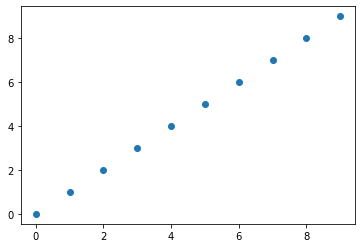

In [147]:
# thresholds, precisions, recalls, f1_scores  = extract_data(file)
# print(f1_scores)

f = plt.figure()
plt.plot(range(10), range(10), "o")
plt.show()

f.savefig("plots/foo.pdf", bbox_inches='tight')

In [145]:
def plot_data(file, thresholds, precisions, recalls, f1_scores):
    f = plt.figure(figsize=(9,7))
    plt.plot(thresholds, precisions, label="Precision")
    plt.plot(thresholds, recalls, label="Recall")
    plt.plot(thresholds, f1_scores, label="F1 Score")
    plt.xlabel('Threshold')
    plt.ylabel('Accuracy')
    plt.title(file[:-4].replace("_", " "))
    plt.legend(loc='upper left')
    plt.show()

    f.savefig("plots/"+file[:-4]+"_plot.pdf", bbox_inches='tight')


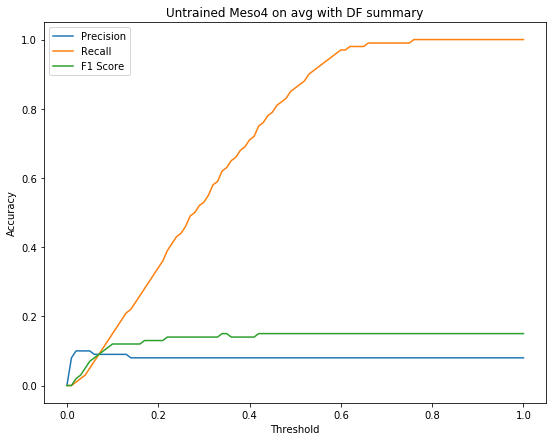

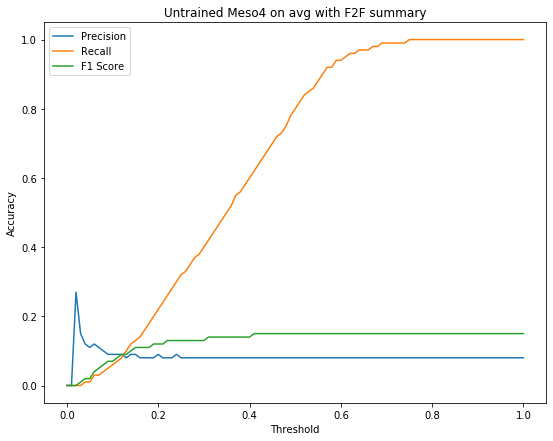

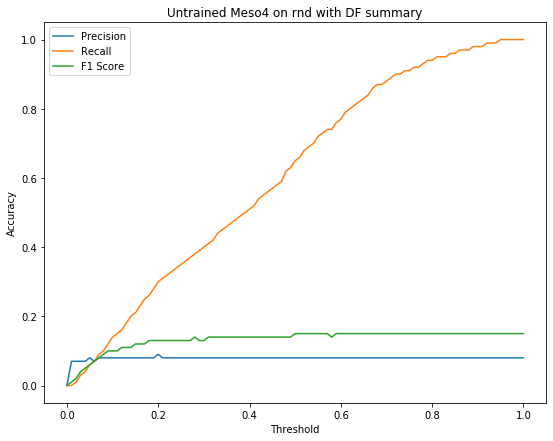

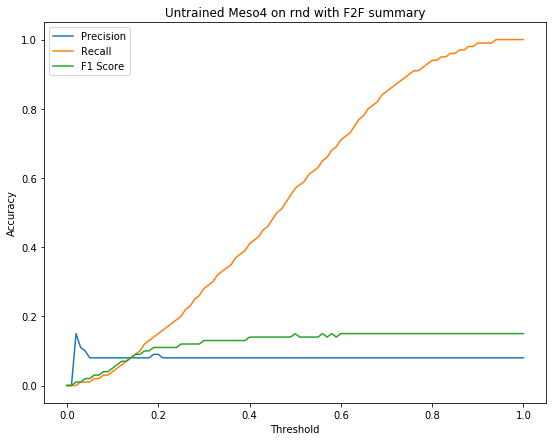

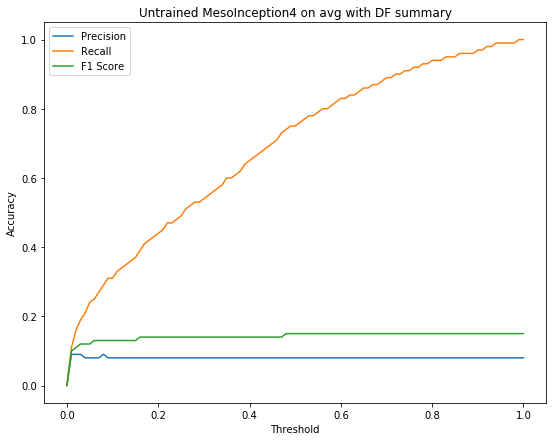

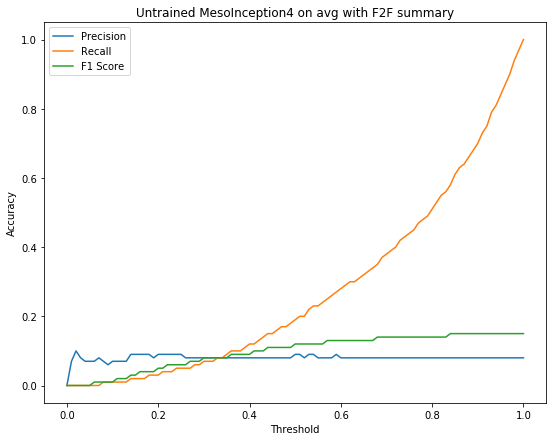

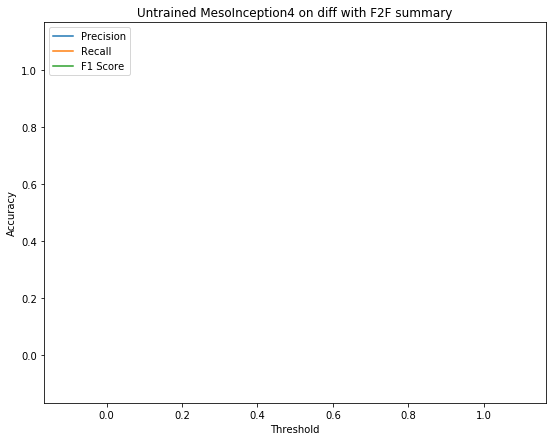

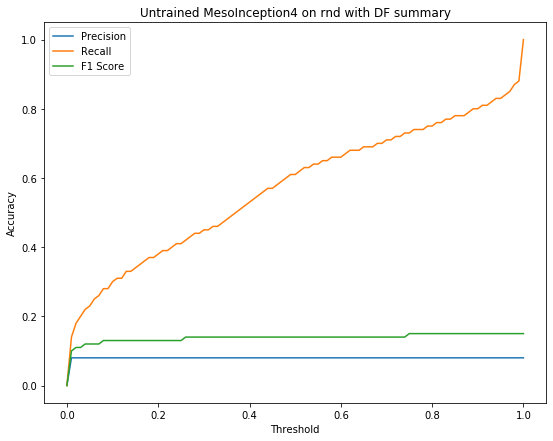

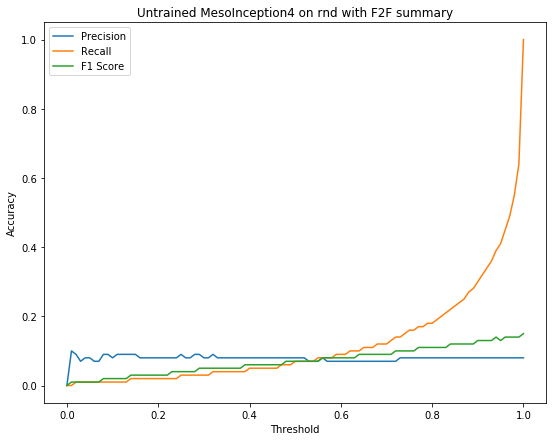

In [146]:
files = []
file1 = "Untrained_Meso4_on_avg_with_DF_summary.txt"
file2 = "Untrained_Meso4_on_avg_with_F2F_summary.txt"
file3 = "Untrained_Meso4_on_rnd_with_DF_summary.txt"
file4 = "Untrained_Meso4_on_rnd_with_F2F_summary.txt"
file5 = "Untrained_MesoInception4_on_avg_with_DF_summary.txt"
file6 = "Untrained_MesoInception4_on_avg_with_F2F_summary.txt"
file7 = "Untrained_MesoInception4_on_diff_with_F2F_summary.txt"
file8 = "Untrained_MesoInception4_on_rnd_with_DF_summary.txt"
file9 = "Untrained_MesoInception4_on_rnd_with_F2F_summary.txt"

files = [file1, file2,file3,file4, file5, file6, file7, file8, file9]

for file in files:
    thresholds, precisions, recalls, f1_scores =  extract_data(file)
    plot_data(file, thresholds, precisions, recalls, f1_scores)